In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

   feature  target
0        1     1.5
1        2     1.8
2        3     3.2
3        4     3.8
4        5     5.1


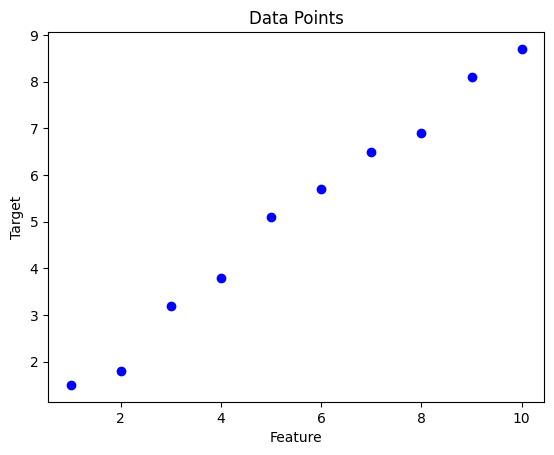

In [2]:
# Example Dataset
data = {
    'feature': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'target': [1.5, 1.8, 3.2, 3.8, 5.1, 5.7, 6.5, 6.9, 8.1, 8.7]
}
df = pd.DataFrame(data)

# Inspect the dataset
print(df.head())

# Scatter plot
plt.scatter(df['feature'], df['target'], color='blue')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Data Points')
plt.show()


In [3]:
# Split data
X = df[['feature']].values
y = df['target'].values

# Standardize features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()  # Flatten target


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


In [5]:
# Initialize SVR with RBF kernel
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Fit the model
svr_model.fit(X_train, y_train)


SVR()

In [9]:
# Predict on test data
y_pred_scaled = svr_model.predict(X_test)

# Reverse scaling for actual predictions
# Reverse scaling for actual predictions
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()  # Reshape to 2D, then flatten back to 1D
y_test_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()  # Reshape to 2D, then flatten back to 1D


In [10]:
# Evaluate performance
mse = mean_squared_error(y_test_actual, y_pred)
r2 = r2_score(y_test_actual, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 0.5338298002216874
R² Score: 0.9462000705243954


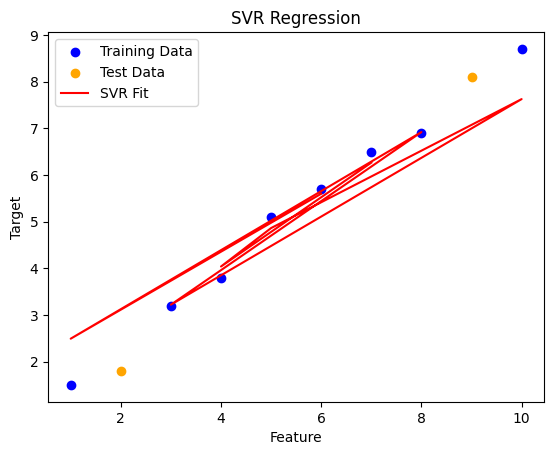

In [12]:
# Reverse scaling for train data predictions
y_pred_train = scaler_y.inverse_transform(svr_model.predict(X_train).reshape(-1, 1)).ravel()  # Reshape to 2D and flatten back to 1D
X_train_actual = scaler_X.inverse_transform(X_train)  # This is already a 2D array

# Scatter plot with SVR curve
plt.scatter(X_train_actual, scaler_y.inverse_transform(y_train.reshape(-1, 1)).ravel(), color='blue', label='Training Data')  # Reshape y_train
plt.scatter(scaler_X.inverse_transform(X_test), y_test_actual, color='orange', label='Test Data')  # Use corrected y_test_actual
plt.plot(X_train_actual, y_pred_train, color='red', label='SVR Fit')

plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('SVR Regression')
plt.legend()
plt.show()
